In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
datatestnocrop = r"D:\InceptionNet\DATATEST100 class\100classtestnocrop"
datacob = r"D:\InceptionNet\mediamdata"
#C:\InceptionNet\mediamdata 

In [2]:
def Nornal224S(image_path):
    """
    รับที่อยู่ไฟล์รูปภาพ แล้วโหลด, ปรับขนาด, และทำ preprocessing
    """
    # 1. อ่านไฟล์รูปภาพจากที่อยู่ (path)
    img = tf.io.read_file(image_path)
    
    # 2. ถอดรหัสไฟล์ให้เป็น tensor ของรูปภาพ
    img = tf.image.decode_jpeg(img, channels=3)
    # 3. ปรับขนาดรูปภาพ (Resize)
    img = tf.image.resize(img, [224, 224])
    # 4. แปลงประเภทข้อมูลและทำ Normalization
    img = tf.cast(img, tf.float32)
    img = img / 255.0  # Normalization
    img = tf.clip_by_value(img, 0.0, 1.0)
    # 5. กำหนด shape เพื่อป้องกัน error
    img.set_shape((224, 224, 3))
    
    return img

In [ ]:
model44 = load_model(r'D:\final_facenet\trian\facenet\resnet\modelR9.h5')

In [4]:
import os
def loadclass(dataset_path):
    
    #สร้าง dictionary 
    class_image_paths = {}
    for class_name in os.listdir(dataset_path): #os.listdir ดึงรายชื่อไฟล์/โฟเดอร์ใน paht
        class_dir = os.path.join(dataset_path, class_name)#os.path.join = images\photo.jpg
        #print(class_dir)
        if os.path.isdir(class_dir):#ตรวจสอบclass_dir เป็นโฟลเดอร์ถ้าเป็นโฟลเดอร์ จะเข้าไปทำงานต่อ
            image_files = [ 
                os.path.join(class_dir, img) #
                for img in os.listdir(class_dir) # ดึงรายชื่อ
                if img.lower().endswith(('.jpg', '.jpeg', '.png')) #
            ]
            if len(image_files) >= 2:  # ขั้นต่ำ 3 ภาพผป
                class_image_paths[class_name] = image_files # สร้าง dictionary

    return class_image_paths

In [5]:
data = loadclass(datatestnocrop)

In [6]:
print(len(data))

101


In [7]:
classes = list(data.keys())

In [8]:
print(classes)

['101680', '101917', '103158', '1064', '106807', '1074', '10852', '108520', '112586', '117062', '120419', '123634', '126232', '127693', '130661', '13458', '136469', '138696', '139360', '139462', '145444', '161193', '162577', '163911', '164330', '166794', '173900', '176547', '176820', '180614', '182838', '193428', '195737', '2003', '200374', '202306', '202728', '215202', '215808', '220549', '222506', '224257', '225925', '233751', '235249', '237834', '241278', '243626', '250725', '253386', '260543', '260934', '261136', '264885', '267875', '272243', '272945', '273806', '274869', '27848', '27896', '280309', '281494', '281965', '290618', '293528', '293748', '29493', '30787', '310600', '330507', '33206', '333381', '334241', '335616', '336343', '344825', '349511', '351592', '358', '37083', '37417', '38840', '40106', '4059', '42639', '47244', '51808', '65088', '70269', '70772', '73790', '79538', '79916', '80004', '8966', '90382', '9322', '93387', '95217', '99626']


In [9]:
smae_eculidean = []
smae_cosine = []
smae_embedding1 = []
smae_embedding2 = []

sameeculidean = 0
samecosine = 0
intx = 0
for image in classes:
    pathim = data[image]
    intx = intx+1
    if len(pathim) >=2:
        img1_path = pathim[0]
        img2_path = pathim[1]
        img1 = Nornal224S(img1_path)
        img2 = Nornal224S(img2_path)
        img1 = tf.expand_dims(img1, axis=0)
        img2 = tf.expand_dims(img2, axis=0)
        em1 = model44.predict(img1).squeeze()
        em2 = model44.predict(img2).squeeze()
        #embedding1 = model.predict(tf.expand_dims(img1, axis=0))[0]
        #embedding2 = model.predict(tf.expand_dims(img2, axis=0))[0]
        smae_embedding1.append(em1)
        smae_embedding2.append(em2)
        euclidean_dist = np.linalg.norm(em1 - em2)
        smae_eculidean.append(euclidean_dist)

        dot_product = np.dot(em1, em2)
        norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
        cosine_sim = dot_product / (norm_product + 1e-8)
        smae_cosine.append(cosine_sim)



1/1 [==============================] - 0s 51ms/step


In [10]:
#print(embedding1)
print(type(smae_embedding1[0]))

<class 'numpy.ndarray'>


In [11]:
import random

negative_pairs = []

classes_list = list(data.keys())  # data = dict ที่มี key = class_name

num_negatives = 100  # จะสร้างกี่คู่ negative

for _ in range(num_negatives):
    # เลือก 2 class ต่างกัน
    class1, class2 = random.sample(classes_list, 2)
    
    # เลือกภาพ 1 ใบจากแต่ละ class
    img1_path = random.choice(data[class1])
    img2_path = random.choice(data[class2])
    
    # เพิ่มเข้าลิส
    negative_pairs.append((img1_path, img2_path))


In [12]:
euclidean_diff = []
cosine_diff = []
diff_embedding1 =[]
diff_embedding2 =[]

for img1_path, img2_path in negative_pairs:
    img1 = Nornal224S(img1_path)
    img2 = Nornal224S(img2_path)
    
    img1 = tf.expand_dims(img1, axis=0)
    img2 = tf.expand_dims(img2, axis=0)
    
    em1 = model44.predict(img1)[0]  #ตัด batch
    em2 = model44.predict(img2)[0]
    diff_embedding1.append(em1)
    diff_embedding2.append(em2)
    # Euclidean
    euclidean_dist = np.linalg.norm(em1 - em2)
    euclidean_diff.append(euclidean_dist)
    
    # Cosine
    dot_product = np.dot(em1, em2)
    norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
    cosine_sim = dot_product / (norm_product + 1e-8)
    cosine_diff.append(cosine_sim)


1/1 [==============================] - 0s 39ms/step


In [13]:
print(cosine_diff)
print(euclidean_diff)

[0.7142100262746478, 0.7900350014838053, 0.7567506952904642, 0.7796265404939873, 0.6166008053154678, 0.8582554969792737, 0.8960085955669461, 0.9220339563672765, 0.6944592939584469, 0.4992068956045497, 0.8794901807270177, 0.6148639396769302, 0.5029863668433203, 0.797755209307033, 0.7371376961829786, 0.32698674631878577, 0.772146024859036, 0.7438622333362753, 0.851081872609721, 0.7523974104981817, 0.6829705577127404, 0.3253691163904739, 0.6530990924553423, 0.5949441135039891, 0.712467399569333, 0.6676768989937667, 0.29161353365712767, 0.8521632202577827, 0.36438398380580517, 0.583183709891166, 0.6669086548697918, 0.533981198693086, 0.7252807544659425, 0.5065003288700386, 0.7951076425141522, 0.8332289373998274, 0.6914382323881475, 0.755376376428917, 0.21967301862347136, 0.8642297138849343, 0.2762701052379413, 0.7669114393790729, 0.8426138580588526, 0.8041213670427098, 0.6838358383838666, 0.6228776961411877, 0.7671012066842902, 0.8495154802197475, 0.680593126166786, 0.8165871687388964, 0.7

In [14]:
print(smae_cosine)
print(smae_eculidean)

[0.9876916309769656, 0.9746495953667237, 0.9767234213862671, 0.8479367915199163, 0.935666372956111, 0.9011073559478896, 0.6764765524541838, 0.8480775090379251, 0.8305050546627896, 0.9956792493434395, 0.9403214289476335, 0.985662808098389, 0.9155002094450451, 0.6877532942514084, 0.8052454394190116, 0.8665572159129533, 0.8014856496770991, 0.9928021331689025, 0.9760662815715822, 0.8343926884645343, 0.9202242354056971, 0.9382013584730585, 0.8134382881836714, 0.9404238368405737, 0.8606506333892375, 0.9642162801294107, 0.9656602582317512, 0.9050928803231414, 0.9421262577885364, 0.8671334219963893, 0.903020784349384, 0.7998682657285117, 0.8793454606423242, 0.898669341001927, 0.9084220328590953, 0.9061944338178775, 0.9508638257584182, 0.8567030344169785, 0.9258338120383538, 0.8282624400282277, 0.8561393275726817, 0.8010747115463845, 0.9355807730076992, 0.8856658182785362, 0.9266874610127547, 0.8713111117559292, 0.8450396480122518, 0.8529927645261027, 0.8414222419413933, 0.9632612944634477, 0.9

In [15]:
import matplotlib.pyplot as plt

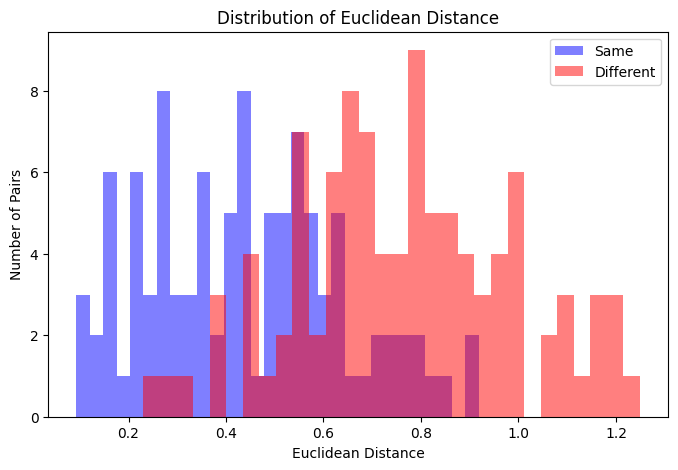

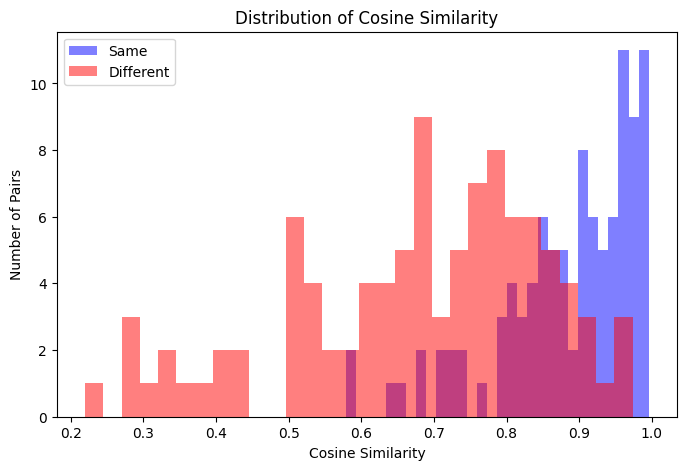

In [16]:
#eculidean
plt.figure(figsize=(8,5))
plt.hist(smae_eculidean, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(euclidean_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Euclidean Distance")
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()

#cosine
plt.figure(figsize=(8,5))
plt.hist(smae_cosine, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(cosine_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()


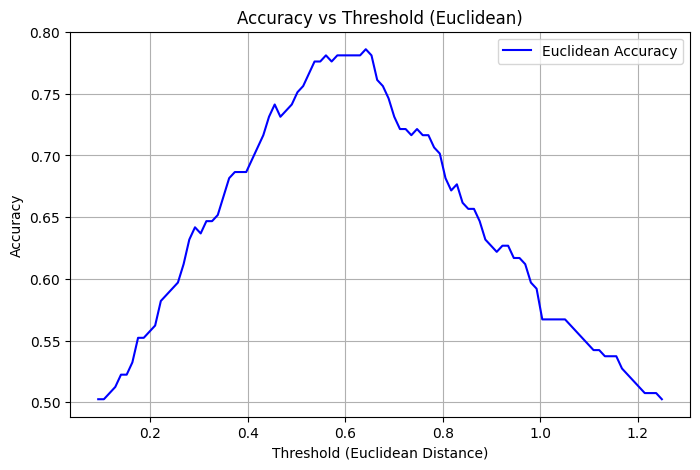

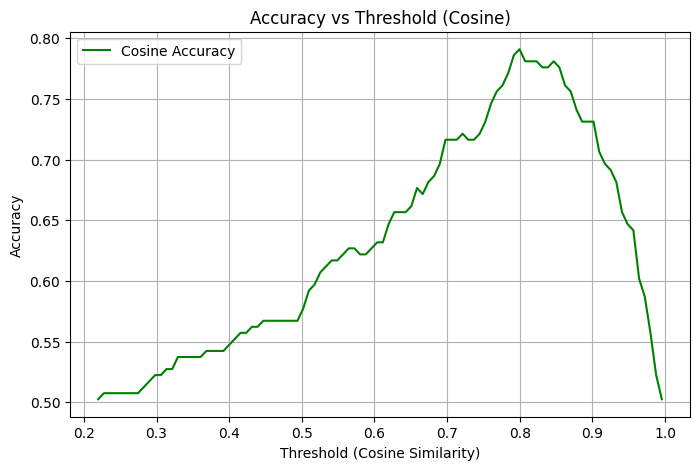

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# สมมติว่าคุณมี
# euclidean_same, euclidean_diff, cosine_same, cosine_diff

def accuracy_vs_threshold(distance_same, distance_diff, metric_type='euclidean'):
    all_values = distance_same + distance_diff  # สำหรับหา range threshold
    min_val, max_val = min(all_values), max(all_values)
    
    thresholds = np.linspace(min_val, max_val, 100)
    accuracies = []

    for t in thresholds:
        if metric_type == 'euclidean':
            # Euclidean: smaller = same
            correct_same = np.sum(np.array(distance_same) <= t)
            correct_diff = np.sum(np.array(distance_diff) > t)
        elif metric_type == 'cosine':
            # Cosine: larger = same
            correct_same = np.sum(np.array(distance_same) >= t)
            correct_diff = np.sum(np.array(distance_diff) < t)
        else:
            raise ValueError("metric_type must be 'euclidean' or 'cosine'")
        
        acc = (correct_same + correct_diff) / (len(distance_same) + len(distance_diff))
        accuracies.append(acc)
    
    return thresholds, accuracies

# -----------------------------
# Plot Euclidean Accuracy vs Threshold
# -----------------------------
thresholds_euc, acc_euc = accuracy_vs_threshold(smae_eculidean, euclidean_diff, 'euclidean')

plt.figure(figsize=(8,5))
plt.plot(thresholds_euc, acc_euc, label='Euclidean Accuracy', color='blue')
plt.xlabel('Threshold (Euclidean Distance)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Euclidean)')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot Cosine Accuracy vs Threshold
# -----------------------------
thresholds_cos, acc_cos = accuracy_vs_threshold(smae_cosine, cosine_diff, 'cosine')

plt.figure(figsize=(8,5))
plt.plot(thresholds_cos, acc_cos, label='Cosine Accuracy', color='green')
plt.xlabel('Threshold (Cosine Similarity)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Cosine)')
plt.grid(True)
plt.legend()
plt.show()


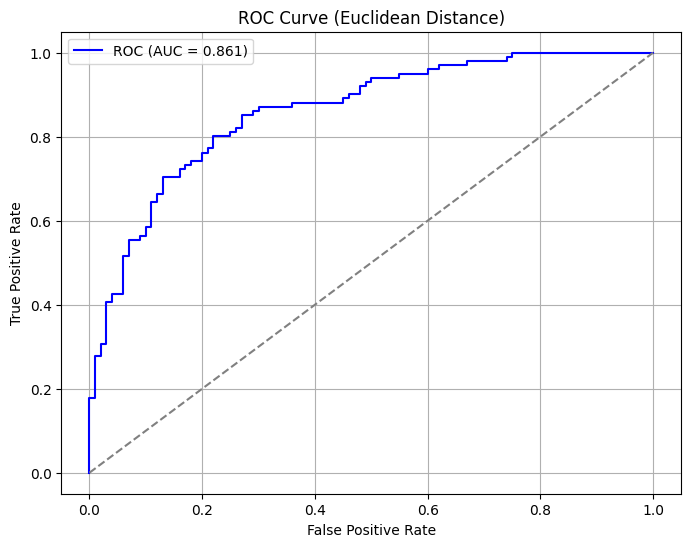

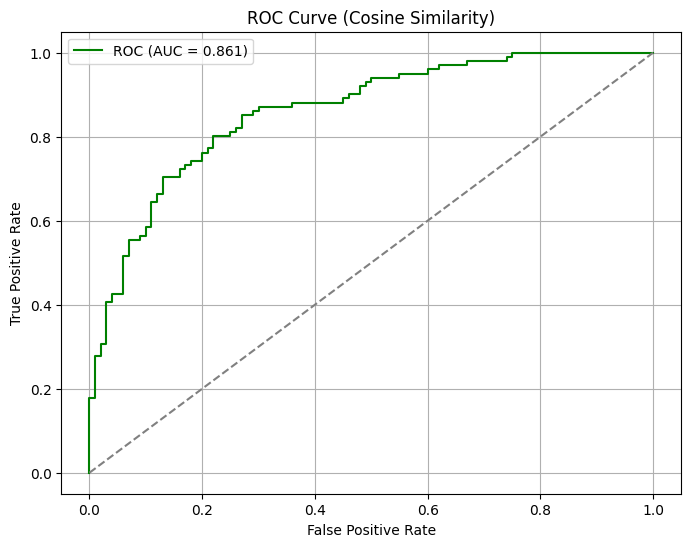

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



y_true_euc = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)  # 1 = same, 0 = different
y_score_euc = [-d for d in smae_eculidean] + [-d for d in euclidean_diff]  # Euclidean: smaller distance = more likely same

y_true_cos = [1]*len(smae_cosine) + [0]*len(cosine_diff)
y_score_cos = list(smae_cosine) + list(cosine_diff)  # Cosine: larger similarity = more likely same


fpr_euc, tpr_euc, thresholds_euc = roc_curve(y_true_euc, y_score_euc)
auc_euc = roc_auc_score(y_true_euc, y_score_euc)

plt.figure(figsize=(8,6))
plt.plot(fpr_euc, tpr_euc, color='blue', label=f'ROC (AUC = {auc_euc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')  # เส้นสุ่ม
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Euclidean Distance)')
plt.legend()
plt.grid(True)
plt.show()


fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_true_cos, y_score_cos)
auc_cos = roc_auc_score(y_true_cos, y_score_cos)

plt.figure(figsize=(8,6))
plt.plot(fpr_cos, tpr_cos, color='green', label=f'ROC (AUC = {auc_cos:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


eucdent_theshold = 0.62
cosins_theshold = 0.78

thebest EP44
eucdent_theshold = 0.65
cosins_theshold = 0.78

In [19]:
from sklearn.metrics import precision_score

In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


y_true = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)
y_pred_euc = [1 if d <= 0.65 else 0 for d in smae_eculidean + euclidean_diff]

# Cosine: larger similarity = same
y_pred_cos = [1 if s >= 0.78 else 0 for s in smae_cosine + cosine_diff]

# ==== Euclidean metrics ====
acc_euc = accuracy_score(y_true, y_pred_euc)
prec_euc = precision_score(y_true, y_pred_euc)
rec_euc = recall_score(y_true, y_pred_euc)
f1_euc = f1_score(y_true, y_pred_euc)
auc_euc = roc_auc_score(y_true, [-d for d in smae_eculidean + euclidean_diff])  # note: -distance

# ==== Cosine metrics ====
acc_cos = accuracy_score(y_true, y_pred_cos)
prec_cos = precision_score(y_true, y_pred_cos)
rec_cos = recall_score(y_true, y_pred_cos)
f1_cos = f1_score(y_true, y_pred_cos)
auc_cos = roc_auc_score(y_true, smae_cosine + cosine_diff)

# ==== แสดงผล ====
print("=== Euclidean Metrics ===")
print(f"Accuracy: {acc_euc:.4f}, Precision: {prec_euc:.4f}, Recall: {rec_euc:.4f}, F1-score: {f1_euc:.4f}, AUC: {auc_euc:.4f}")

print("\n=== Cosine Metrics ===")
print(f"Accuracy: {acc_cos:.4f}, Precision: {prec_cos:.4f}, Recall: {rec_cos:.4f}, F1-score: {f1_cos:.4f}, AUC: {auc_cos:.4f}")


=== Euclidean Metrics ===
Accuracy: 0.7811, Precision: 0.7395, Recall: 0.8713, F1-score: 0.8000, AUC: 0.8607

=== Cosine Metrics ===
Accuracy: 0.7662, Precision: 0.7213, Recall: 0.8713, F1-score: 0.7892, AUC: 0.8607


=== Euclidean Metrics ===
Accuracy: 0.7313, Precision: 0.6911, Recall: 0.8416, F1-score: 0.7589, AUC: 0.8104

=== Cosine Metrics ===
Accuracy: 0.7264, Precision: 0.6825, Recall: 0.8515, F1-score: 0.7577, AUC: 0.8104